## This notebook focusses on a algorithm that can deal with temporal data, like: ARIMA

In [64]:
import numpy as np
import pandas as pd
import sklearn as sk
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error

In [55]:
from datetime import datetime

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv("data/new_data_no_missingvalues.csv", parse_dates=['date'], date_parser=parser)
raw = pd.read_csv("data/dataset_mood_smartphone.csv", parse_dates=['time'], date_parser=parser)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/parsers.py:3339: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


ValueError: unconverted data remains:  13:00:00.000

In [54]:
raw

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [36]:
dfp = df.drop(["date", "id", "unique_id", "Unnamed: 0", "total_calls", "total_sms", "average_com", "average_soc", "average_finance", "average_entertainment"], axis=1)

In [37]:
dfp = dfp/dfp.std(0)
dfp = minmax_scaling(dfp, columns=dfp.columns)

In [38]:
dfp.insert(loc=0, column='date', value=df['date'])
dfp.insert(loc=0, column='id', value=df['id'])

In [39]:
new_dfp = dfp[['date', 'id','average_mood']]

In [41]:
new_dfp.set_index('date', inplace=True)
#dfp.index = dfp.index.to_period('D')
#dfp.index.to_pydatetime()

In [24]:
#new_dfp.index = new_dfp.index.to_period('D')

In [42]:
# dfp.to_csv("./data/final_dataset.csv")

,id,average_mood
date,,
2014-02-26,AS14.01,0.513158
2014-03-21,AS14.01,0.513158
2014-03-22,AS14.01,0.536842
2014-03-23,AS14.01,0.600000
2014-03-24,AS14.01,0.473684
...,...,...
2014-05-25,AS14.33,0.513158
2014-05-26,AS14.33,0.378947
2014-05-27,AS14.33,0.505263


In [46]:
list_ids = new_dfp.id.unique()
list_dfs = [] 
for x in list_ids:
    window = new_dfp.loc[new_dfp['id'] == x]
    df_cor = window.drop(["id"], axis=1)
    list_dfs.append(df_cor)

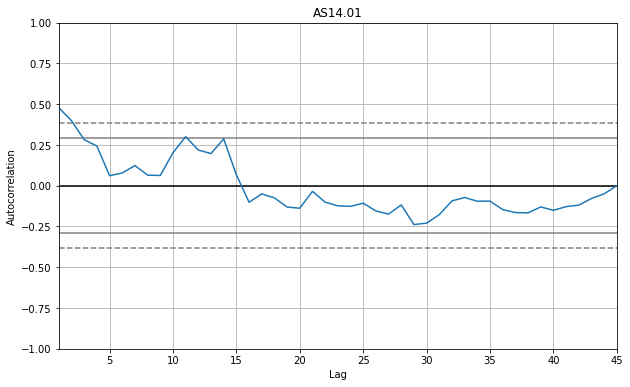

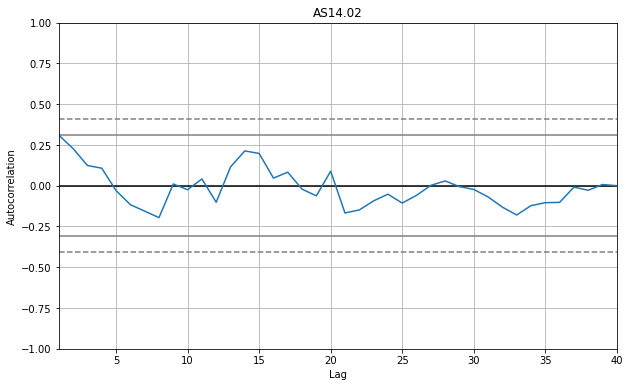

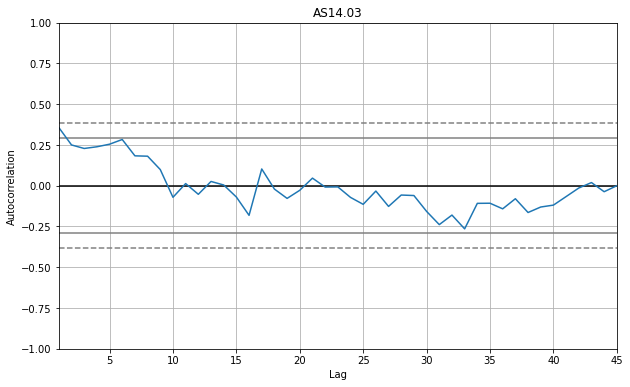

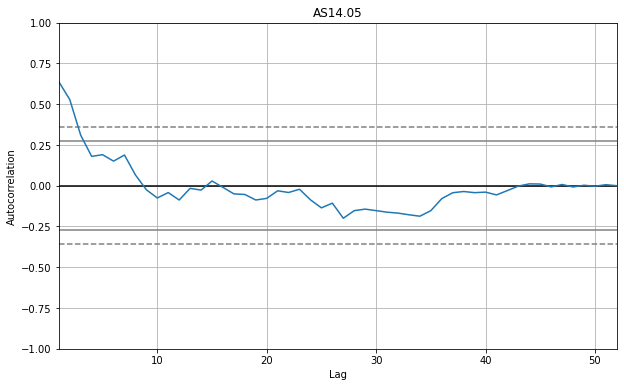

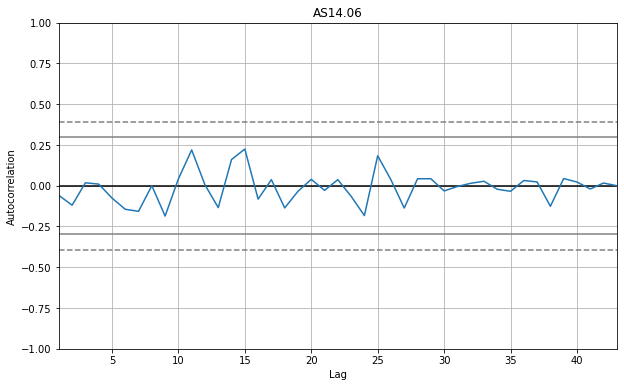

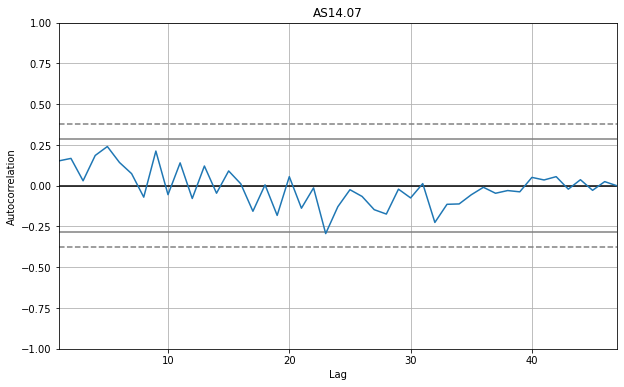

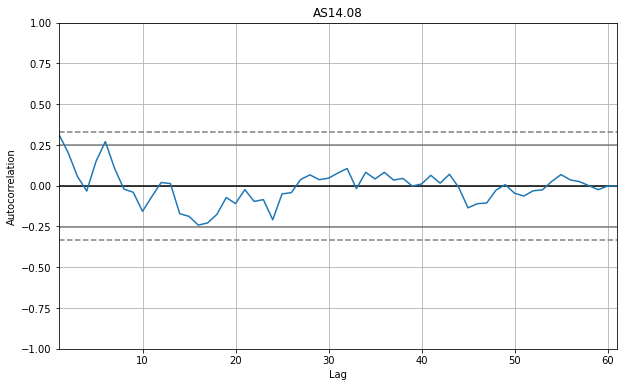

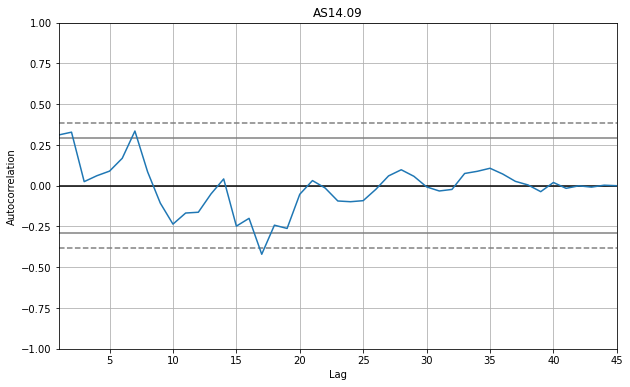

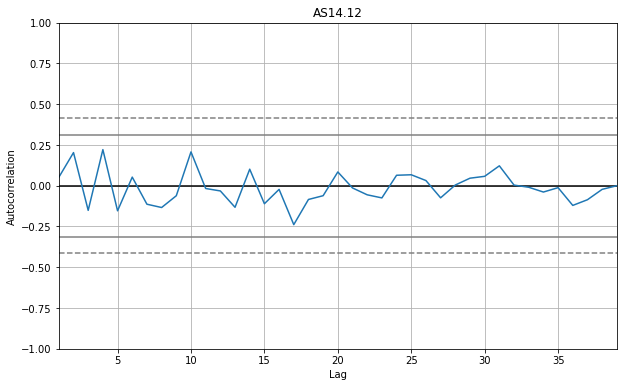

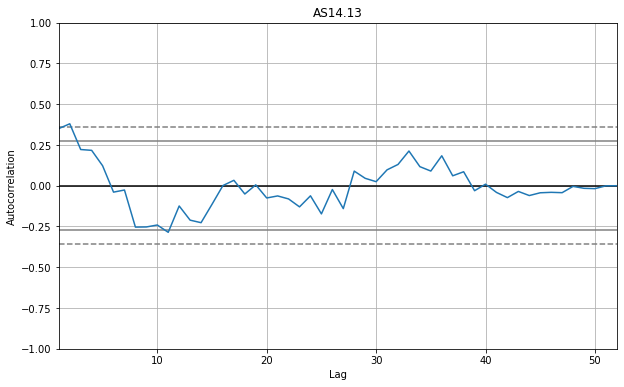

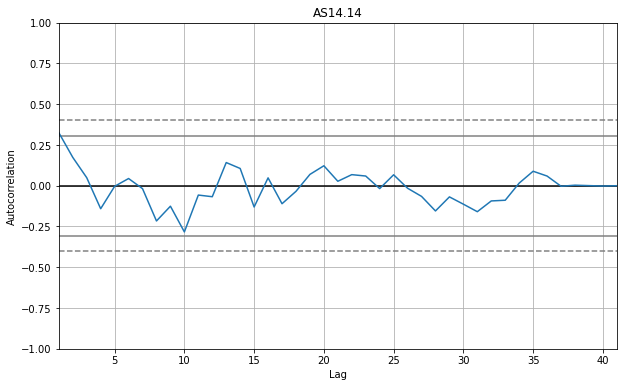

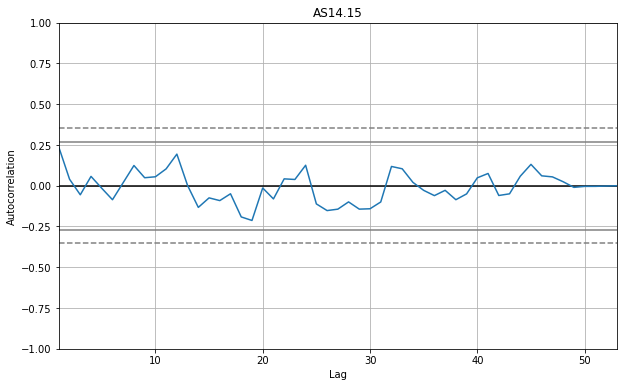

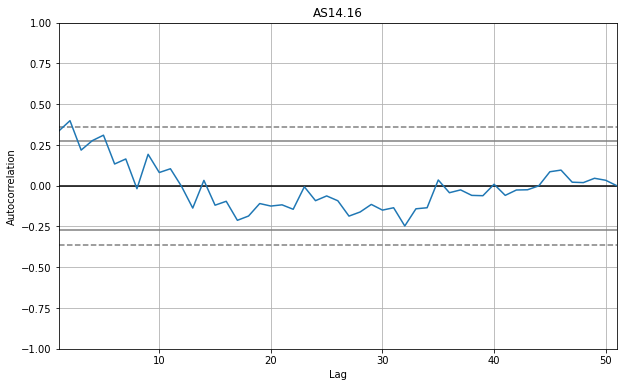

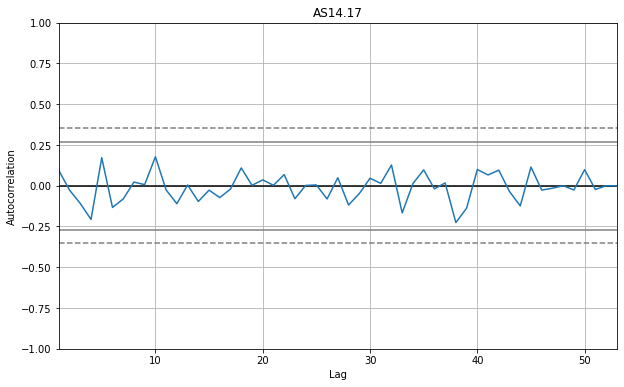

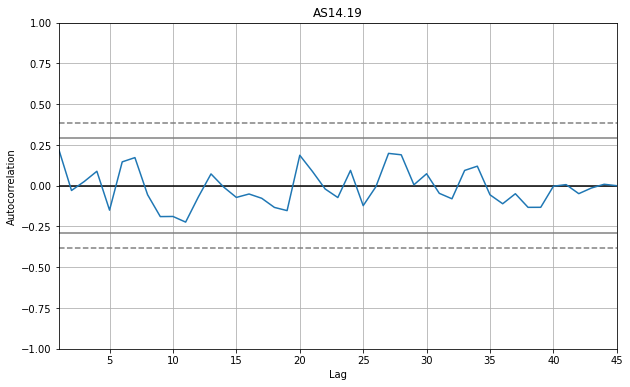

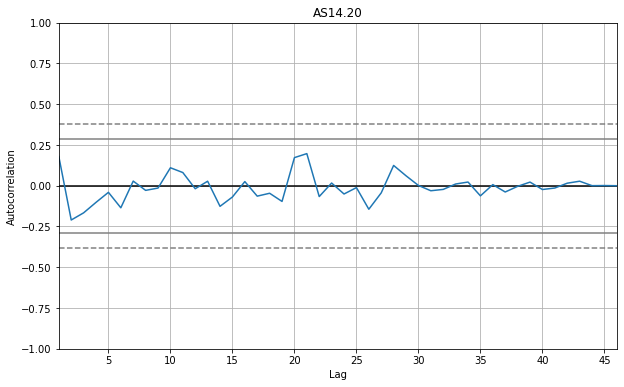

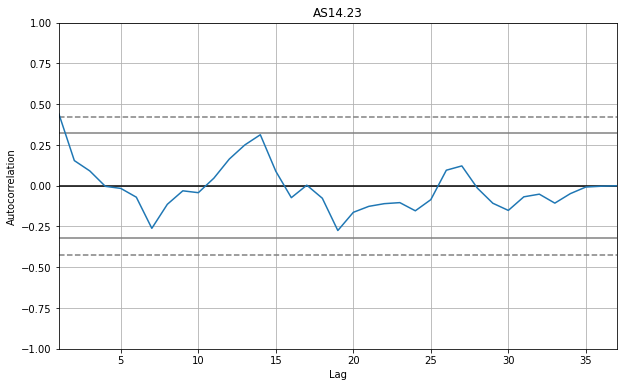

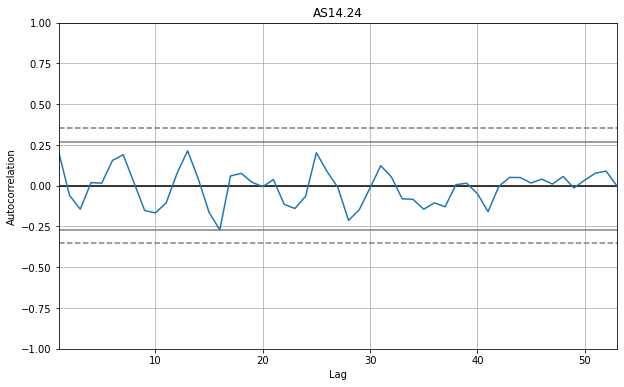

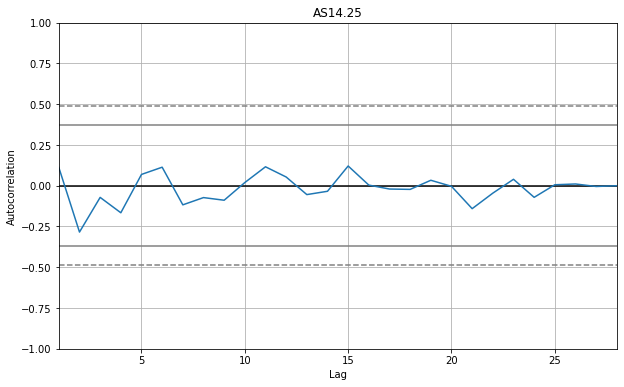

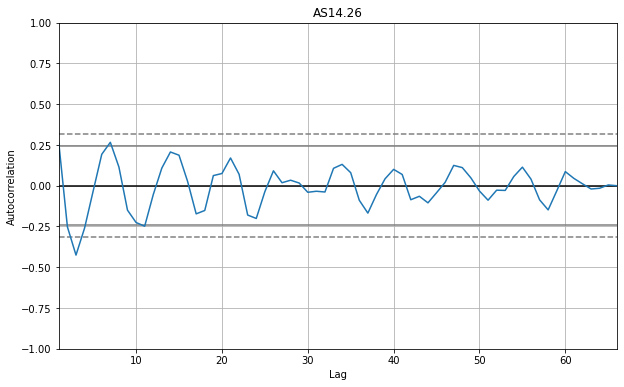

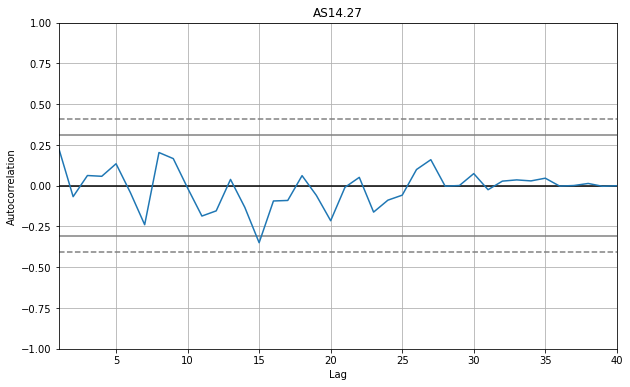

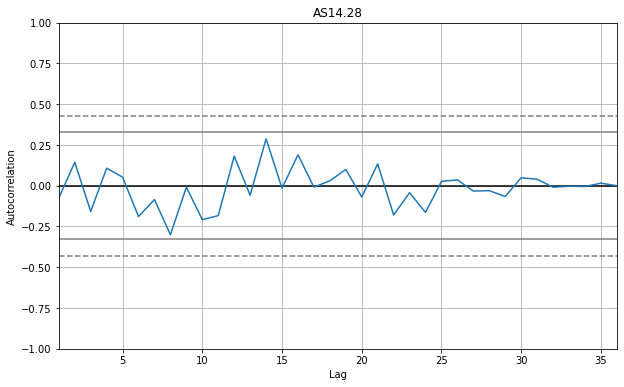

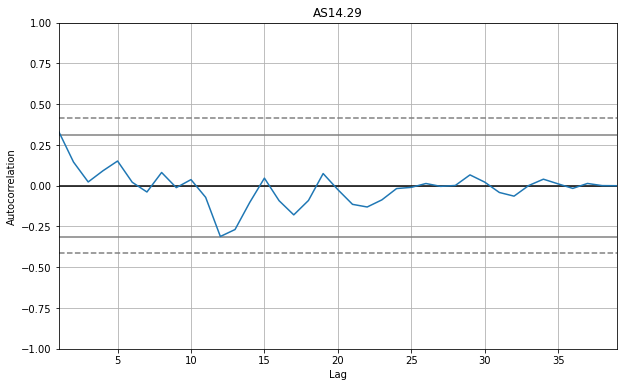

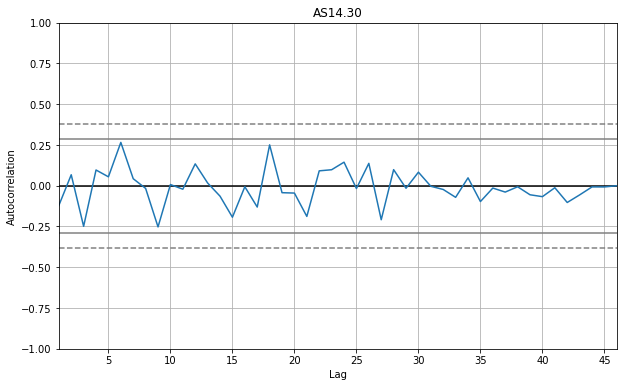

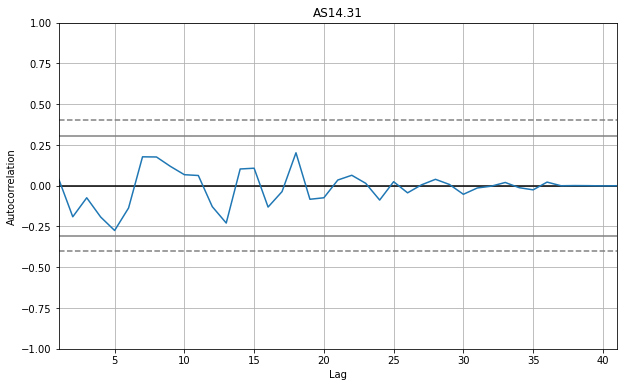

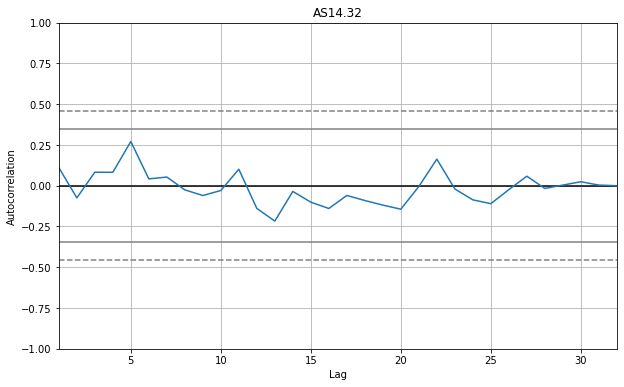

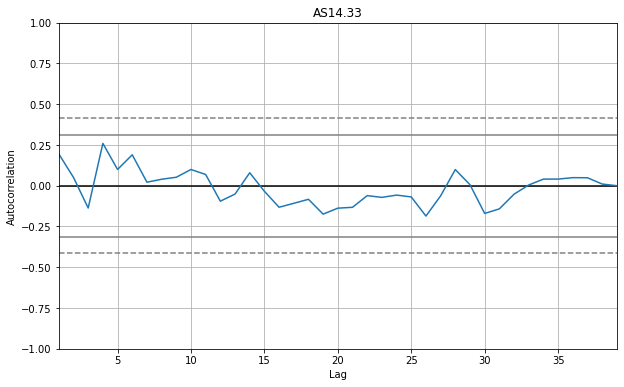

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

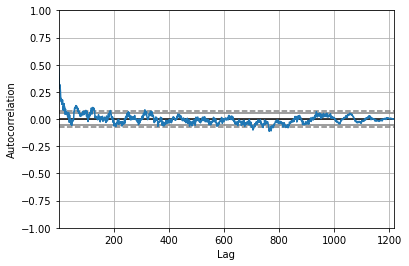

In [49]:
for i in range(len(list_dfs)):
    plt.figure(figsize=(10,6))
    autocorrelation_plot(list_dfs[i])
    plt.title(list_ids[i])
    plt.show()

autocorrelation_plot(new_dfp.drop(['id'], axis=1))

In [50]:
model = ARIMA(new_dfp.drop(['id'], axis=1), order=(25,1,0))
#for i in range(len(list_dfs)):
#    model = ARIMA(list_dfs[i], order=(25,1,0))
#    model_fit = model.fit()
    # summary of fit model
#    print(model_fit.summary())

/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/root/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/root/venv

In [51]:
model_fit = model.fit()

In [52]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           average_mood   No. Observations:                 1215
Model:                ARIMA(25, 1, 0)   Log Likelihood                1111.905
Date:                Mon, 12 Apr 2021   AIC                          -2171.809
Time:                        08:32:57   BIC                          -2039.166
Sample:                             0   HQIC                         -2121.872
                               - 1215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6493      0.024    -27.115      0.000      -0.696      -0.602
ar.L2         -0.4931      0.029    -16.815      0.000      -0.551      -0.436
ar.L3         -0.4912      0.036    -13.703      0.0

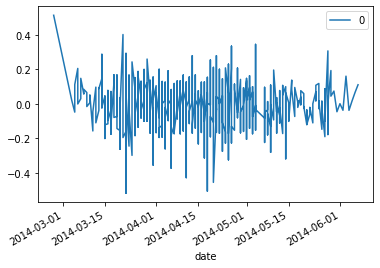

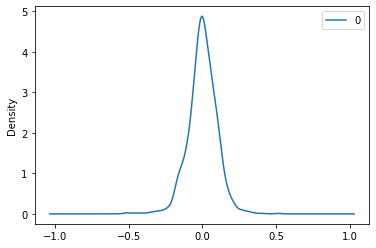

                 0
count  1215.000000
mean      0.000507
std       0.097908
min      -0.519316
25%      -0.049882
50%       0.001592
75%       0.059394
max       0.513158


In [59]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [61]:
# split into train and test sets
X = new_dfp.drop(['id'], axis=1).values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(25,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.664600, expected=0.757895


Test RMSE: 0.098


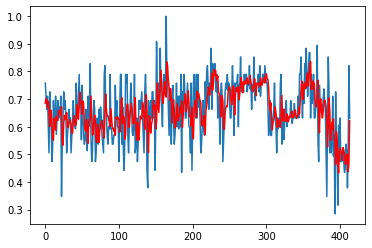

In [65]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79defa5-2359-4699-82dc-d6bf5eddd7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>